#### EP4130: Data Science Analysis

#### Assignment 8

#### Tanmay Goyal- AI20BTECH11021

In [7]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular

**Question 1**

Calculate the angular two-point correlation function of galaxies(including the error obtained by 10 bootstrap resamples) using subsets of the data from the Blanco Cosmology Survey with r-band magnitude between 17 and 20, and using 16 logarthmic-spaced angular bins from 1/$60\degree \text{ to } 1\degree$. Use a linear scale for the y-axis. Galaxies in Blanco Cosmology Survey have spread_model > 0.002. Download the data from https://people.iith.ac.in/shantanud/BCS05hr_reduced.txt

In [8]:
data = pd.read_csv("Blanco.csv" , sep = ' ')
data

,#RA,DEC,r-mag,spread_model,spread_model_err
0,76.709724,-56.091484,22.2622,0.113884,0.002812
1,77.430664,-56.090149,23.8355,0.186889,0.003559
2,76.937309,-56.092442,17.7021,0.000614,0.000120
3,77.344833,-56.089947,23.7293,0.117396,0.000751
4,77.416412,-56.089119,23.4456,0.192760,0.004764
...,...,...,...,...,...
49995,77.138313,-53.850994,16.4224,0.000928,0.004025
49996,76.861160,-53.846672,22.1385,0.076647,0.018807
49997,76.892189,-53.855347,20.5829,0.013071,-0.001716
49998,77.500732,-53.853760,20.7490,0.017413,-0.000761


In [9]:
blanco = data[(data['spread_model'] > 0.002) & (data['r-mag'] > 17) & (data['r-mag'] < 20)]
blanco

,#RA,DEC,r-mag,spread_model,spread_model_err
16,77.039696,-56.084904,19.9448,0.008856,0.000064
38,77.119270,-56.108150,19.6127,0.006623,-0.000183
43,76.676086,-56.106075,18.8138,0.002451,0.000430
151,77.118393,-56.084389,19.7339,0.009028,0.020733
153,76.823029,-56.082844,19.8468,1.937630,0.019814
...,...,...,...,...,...
49924,77.387482,-53.855377,19.8971,0.010697,-0.000017
49935,76.962509,-53.848270,19.8635,0.003855,-0.001900
49962,77.199036,-53.847679,19.6593,4.073760,0.017146
49969,77.251816,-53.856327,18.7764,0.435740,0.023601


In [11]:
# reference: https://www.astroml.org/book_figures/chapter6/fig_correlation_function.html

bins = 10 ** np.linspace(np.log10(1.0/60) , np.log10(1) , 16)
results = [bins]

results += bootstrap_two_point_angular(blanco["#RA"] , blanco["DEC"] , bins = bins \
, method = "landy-szalay" , Nbootstraps = 10)

In [15]:
bins , corr ,  corr_err , bootstrap = results
bin_centers = []
for idx in range(len(bins)-1):
    bin_centers.append((bins[idx] + bins[idx+1])/2)

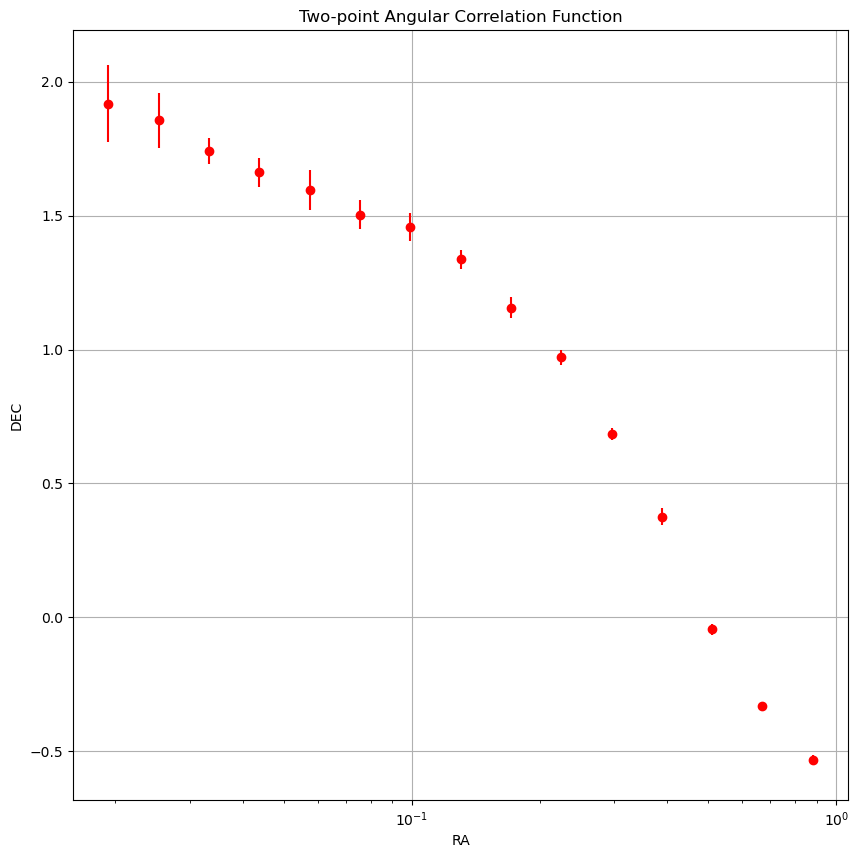

In [22]:
plt.figure(figsize = (10,10))
plt.xscale('log')
plt.yscale('linear')
plt.grid(True)
plt.errorbar(bin_centers , corr , yerr = corr_err , fmt = 'o' , color = 'r')
plt.title("Two-point Angular Correlation Function")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.show()